In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    H3 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    H2 = [[0, x[1]], [x[1], 0]]
    H2 = [[0, x[2]], [x[2], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    H1 = somar(H1, np.dot(complex(0,1),H2))
    Result4 = rungeKutta(psi0, h, somar(H3, H1), t = 2, t0 = 0, p = 0)
    P = [[Result4[0][1]],[Result4[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    P[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    P[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    H3 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    H2 = [[0, z[1]], [z[1], 0]]
    H2 = [[0, z[2]], [z[2], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    H1 = somar(H1, np.dot(complex(0,1),H2))
    Result4 = rungeKutta(psi0, h, somar(H3, H1), t = 2, t0 = 0, p = 0)
    P = [[Result4[0][1]],[Result4[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    P[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    P[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.7996519240445633-0.019023896856291446j)], [(0.5990284889319323-0.03687493752867547j)]]
iteracao:  2
[[(0.797763368618264-0.04530974128023197j)], [(0.5954539627279982-0.08339791763342884j)]]
iteracao:  3
[[(0.7972346915966703-0.056182696348688596j)], [(0.5910581680664718-0.10913566063259938j)]]
iteracao:  4
[[(0.8003764095964393-0.04724775659922393j)], [(0.5878298383275872-0.10780228630045417j)]]
iteracao:  5
[[(0.8047745147248173-0.031012325897845416j)], [(0.5849511723321611-0.09596010298105777j)]]
iteracao:  6
[[(0.8061563768668306-0.03292964822087703j)], [(0.5807192317192141-0.1085942331976014j)]]
iteracao:  7
[[(0.8059932618131664-0.04349942931134072j)], [(0.5751660626707834-0.13291599279540237j)]]
iteracao:  8
[[(0.7980154674602854-0.08051670785068482j)], [(0.5648004066374309-0.19413621704397677j)]]
iteracao:  9
[[(0.804183558255512-0.07156758621048337j)], [(0.5586634955117642-0.18989992270585912j)]]
iteracao:  10
[[(0.80798370719736-0.07008298942583875j)], [(0.55

[[(0.3002705692341539-0.8447084310113957j)], [(-0.3667329186187639+0.24862055186870452j)]]
iteracao:  82
[[(0.2790187456662626-0.8597253795044083j)], [(-0.3287739559698332+0.2737306288363531j)]]
iteracao:  83
[[(0.27918436917507583-0.8471466070786776j)], [(-0.35798075413945396+0.276131224686137j)]]
iteracao:  84
[[(0.2573624344741693-0.8612402640514843j)], [(-0.31949357393016353+0.29992265655945577j)]]
iteracao:  85
[[(0.230177229601145-0.8777741029535236j)], [(-0.26712363805250566+0.32430847323006184j)]]
iteracao:  86
[[(0.20139187077563248-0.8918124132829821j)], [(-0.2120222870392421+0.3451933342603743j)]]
iteracao:  87
[[(0.19717988853813656-0.8888556016961282j)], [(-0.2206954753647303+0.3497846084871253j)]]
iteracao:  88
[[(0.19937648181591025-0.881280282391584j)], [(-0.24481781662787244+0.35165078289172974j)]]
iteracao:  89
[[(0.1947474145338958-0.8779581415734661j)], [(-0.25086637191656286+0.3582303221065747j)]]
iteracao:  90
[[(0.16910428230242205-0.8881379556138862j)], [(-0.205

[[(-0.5209870105534108-0.33124875294189127j)], [(-0.042279012873372365-0.7855311513278287j)]]
iteracao:  161
[[(-0.5322655900701951-0.3224890940553756j)], [(-0.08170531322474373-0.7784717551844103j)]]
iteracao:  162
[[(-0.5116184839093375-0.3173937117432583j)], [(-0.10823391824383127-0.7910708458903661j)]]
iteracao:  163
[[(-0.5153646533034748-0.3095166963485055j)], [(-0.1449284596375785-0.7858717044840025j)]]
iteracao:  164
[[(-0.4961094746933477-0.30641512899480255j)], [(-0.17276776503847502-0.7938112889136519j)]]
iteracao:  165
[[(-0.5096034050553522-0.29636635632641767j)], [(-0.2131934995004216-0.7791147471151106j)]]
iteracao:  166
[[(-0.5245759505992776-0.2850908673802637j)], [(-0.25342081475213984-0.7611314372787259j)]]
iteracao:  167
[[(-0.5297762972664867-0.2765259431743359j)], [(-0.2892743239620549-0.7477905774847514j)]]
iteracao:  168
[[(-0.5037266683137338-0.2806100734062362j)], [(-0.31340492817882987-0.7545161929813441j)]]
iteracao:  169
[[(-0.5209987896806163-0.26673515441

[[(-0.5844356514273676+0.15691595565930574j)], [(0.2943104179574005+0.7397253506065985j)]]
iteracao:  240
[[(-0.5874504616558212+0.16849228490356527j)], [(0.32748398611088325+0.7206014210333421j)]]
iteracao:  241
[[(-0.6017911398751292+0.1861384212101837j)], [(0.35642590685802633+0.6900437295875281j)]]
iteracao:  242
[[(-0.6157080612585749+0.20503096865521062j)], [(0.3832479185245971+0.6572570131929074j)]]
iteracao:  243
[[(-0.6437564913395298+0.2344980954916623j)], [(0.40211523382045783+0.6073643240294048j)]]
iteracao:  244
[[(-0.6372905430246201+0.2426684362825989j)], [(0.43143024923459544+0.5906272886279794j)]]
iteracao:  245
[[(-0.6404536854458117+0.2581664328623094j)], [(0.4555066817179798+0.5618564698568675j)]]
iteracao:  246
[[(-0.6514414589378215+0.28136967886588127j)], [(0.4734674493201672+0.5218079755104816j)]]
iteracao:  247
[[(-0.6233250190751816+0.2690783164378602j)], [(0.5106852252247138+0.5275066248237597j)]]
iteracao:  248
[[(-0.6072324320812071+0.26677291918641294j)], 

[[(-0.04209347520378813+0.6179725991098343j)], [(-0.6302194039172652-0.46814667969785845j)]]
iteracao:  319
[[(-0.026964636939384314+0.6107228705872401j)], [(-0.6590051161804623-0.43818095011840746j)]]
iteracao:  320
[[(-0.030093186467797153+0.6313012659170978j)], [(-0.6599522476318189-0.40622154885200346j)]]
iteracao:  321
[[(-0.025315607600906447+0.6406156799706365j)], [(-0.6698592549486668-0.3745117530289936j)]]
iteracao:  322
[[(-0.02211877663948276+0.6540619630110741j)], [(-0.6741611587583793-0.3423744209518586j)]]
iteracao:  323
[[(-0.01682247965911789+0.664870843539586j)], [(-0.6793050284084177-0.3101745438863508j)]]
iteracao:  324
[[(0.004206195754106742+0.6393565059937618j)], [(-0.7170807718862889-0.27748970283212365j)]]
iteracao:  325
[[(0.012948580819217941+0.6429023668092664j)], [(-0.7260889625128026-0.24352310333844523j)]]
iteracao:  326
[[(0.015117554662331115+0.6684990240897362j)], [(-0.7132595483887537-0.2100979120439465j)]]
iteracao:  327
[[(0.028324280938463002+0.6577

[[(0.8049818376724152+0.1377063758666039j)], [(0.5156893923301604-0.2590471039058465j)]]
iteracao:  397
[[(0.8061000937663834+0.12330999940812794j)], [(0.5032953353377396-0.2858161027252775j)]]
iteracao:  398
[[(0.8068673259165581+0.10888693562579939j)], [(0.4896157415518553-0.3120655947867968j)]]
iteracao:  399
[[(0.8090473223157245+0.09703550922658828j)], [(0.47422566363716634-0.3333711389899426j)]]
iteracao:  400
[[(0.824850633500004+0.10441356359652046j)], [(0.45444341358389956-0.31968762849829974j)]]
iteracao:  401
[[(0.8219049463420086+0.08556679115213438j)], [(0.43987780351367817-0.3516501913307461j)]]
iteracao:  402
[[(0.8245907060852333+0.0743467111727557j)], [(0.4225841895862714-0.3687073260794279j)]]
iteracao:  403
[[(0.8395837521395723+0.07697552545741541j)], [(0.4026089519003352-0.3564823681781049j)]]
iteracao:  404
[[(0.855049647147063+0.07970308066351997j)], [(0.3829806328959431-0.34038670609291993j)]]
iteracao:  405
[[(0.8494444143601981+0.05927944375608443j)], [(0.3674

[[(0.45156176127301534-0.8068999281901564j)], [(-0.18117432002749168+0.3349329323680535j)]]
iteracao:  478
[[(0.44820080910572463-0.808793625640068j)], [(-0.18812079966736459+0.3310274797281979j)]]
iteracao:  479
[[(0.43171770906422163-0.8176349696018665j)], [(-0.16327629417753653+0.3441416126979228j)]]
iteracao:  480
[[(0.41658629237263445-0.8252704562611406j)], [(-0.14158094931645654+0.354032613515353j)]]
iteracao:  481
[[(0.4143531582347088-0.8273298630189908j)], [(-0.15033197480624194+0.3481907192213392j)]]
iteracao:  482
[[(0.4032145307217362-0.832968117840397j)], [(-0.1383171668837166+0.3527750555186183j)]]
iteracao:  483
[[(0.395637955875488-0.8370983760393432j)], [(-0.13479973279860813+0.35293862117194263j)]]
iteracao:  484
[[(0.37722382201683924-0.8449136380544897j)], [(-0.1056971255124656+0.36421281062413924j)]]
iteracao:  485
[[(0.35224164190285556-0.8532631032271687j)], [(-0.06159182464959787+0.37957090269527427j)]]
iteracao:  486
[[(0.3294967115853009-0.8596374655660293j)]

[[(-0.2879150701513993-0.46730109869718484j)], [(-0.11539077567993104-0.8279005048818754j)]]
iteracao:  560
[[(-0.2595545587317097-0.4683678852586684j)], [(-0.13445377050133517-0.8337774401772118j)]]
iteracao:  561
[[(-0.24904224079339207-0.467569507673019j)], [(-0.16368204786561907-0.8322046538578719j)]]
iteracao:  562
[[(-0.2543640268105835-0.46405569528309204j)], [(-0.20159523723845793-0.8242028237408999j)]]
iteracao:  563
[[(-0.26059492231221704-0.46028826205013523j)], [(-0.23962407940595112-0.8141283581522265j)]]
iteracao:  564
[[(-0.24079154344677509-0.4647149909887746j)], [(-0.26250995979773345-0.8106464156327801j)]]
iteracao:  565
[[(-0.22015775172455088-0.47056141809033897j)], [(-0.2844191786559438-0.8057344023248932j)]]
iteracao:  566
[[(-0.21775220050050592-0.4708014434137445j)], [(-0.31636053887843874-0.7942579363845828j)]]
iteracao:  567
[[(-0.25167633443818815-0.45543876880721595j)], [(-0.36901177972175797-0.7701068338255266j)]]
iteracao:  568
[[(-0.24324705356073711-0.45

[[(-0.5164054720106906-0.08406994467326245j)], [(0.4249658394299332+0.7386889071615724j)]]
iteracao:  638
[[(-0.5401103497110253-0.061885984206802386j)], [(0.46119289472739017+0.7012500847006344j)]]
iteracao:  639
[[(-0.5584026295659559-0.04102014869279158j)], [(0.4947036392685639+0.6646591545263884j)]]
iteracao:  640
[[(-0.5410043525760755-0.04634418160532398j)], [(0.5246273619941679+0.655692206597528j)]]
iteracao:  641
[[(-0.5342181331793789-0.04416001340584851j)], [(0.554555203161596+0.6364974763101914j)]]
iteracao:  642
[[(-0.5193853081737898-0.049951316909803326j)], [(0.5830698579624116+0.6227141715072159j)]]
iteracao:  643
[[(-0.5261549899494147-0.03572728622709945j)], [(0.6120638525267371+0.5892893676943728j)]]
iteracao:  644
[[(-0.5191813277599191-0.03567012520109238j)], [(0.6388399511945337+0.5666229245160651j)]]
iteracao:  645
[[(-0.5378168296455469-0.005348996453795548j)], [(0.6650996899374927+0.5180410001704655j)]]
iteracao:  646
[[(-0.5480431511780582+0.017248568259286678j

[[(-0.026488855070714117+0.5520613280609878j)], [(-0.7775263782227897-0.29996488146612776j)]]
iteracao:  715
[[(-0.024712341132904495+0.5719486218751281j)], [(-0.7766961847971282-0.2626912229930933j)]]
iteracao:  716
[[(-0.0174237468042217+0.5778468120287549j)], [(-0.7841060309641987-0.22575822234195642j)]]
iteracao:  717
[[(-0.018497519885132745+0.6172621743544442j)], [(-0.7636533813501524-0.18835691839826804j)]]
iteracao:  718
[[(-0.017610634463759288+0.6578580194448634j)], [(-0.7374351465138165-0.15199230077244144j)]]
iteracao:  719
[[(-0.012678053816594894+0.6886050016753358j)], [(-0.7155058394101635-0.11710411686534354j)]]
iteracao:  720
[[(-0.0024572996099565224+0.6932420016839389j)], [(-0.7158674303898968-0.08332390171116807j)]]
iteracao:  721
[[(0.010381761460413185+0.6697085571228897j)], [(-0.7409420727230159-0.048857685229980984j)]]
iteracao:  722
[[(0.02168089515536139+0.6460694982297046j)], [(-0.7628610287439223-0.012913303277720903j)]]
iteracao:  723
[[(0.03172398373825699

[[(0.7260557272971856+0.25742871393855965j)], [(0.6014578108692978-0.21171102530553662j)]]
iteracao:  796
[[(0.7307624751651679+0.24794312936824595j)], [(0.5900440896218968-0.23739818898209183j)]]
iteracao:  797
[[(0.7301751580350363+0.22664126897946713j)], [(0.581893814975386-0.2772671635147997j)]]
iteracao:  798
[[(0.7446443661520905+0.23741054043622653j)], [(0.5597794431611597-0.27529528883672594j)]]
iteracao:  799
[[(0.7552270961146351+0.23911276612803123j)], [(0.5407854273853815-0.28285642575670117j)]]
iteracao:  800
[[(0.7551777393018474+0.22072020540823423j)], [(0.5294469045533783-0.3172927131021527j)]]
iteracao:  801
[[(0.7626312079844856+0.2152532278357671j)], [(0.5114317069098785-0.33241061230210484j)]]
iteracao:  802
[[(0.7663565670545656+0.2038787445312143j)], [(0.49496390029545095-0.35516379953649724j)]]
iteracao:  803
[[(0.7690038635755512+0.19121578748776638j)], [(0.47790662525309013-0.3790440018467666j)]]
iteracao:  804
[[(0.7706178887442667+0.17758629781762508j)], [(0.

[[(0.5429799211699428-0.6337181019788326j)], [(-0.36142218825682104+0.4158697589880166j)]]
iteracao:  876
[[(0.5180727805861289-0.6536787264576084j)], [(-0.3190208977569675+0.450033181342168j)]]
iteracao:  877
[[(0.5235893701411878-0.6506163677180686j)], [(-0.32080962218823167+0.4468032909065613j)]]
iteracao:  878
[[(0.5018656963260486-0.6661345950031314j)], [(-0.28283671151547407+0.47370708163251646j)]]
iteracao:  879
[[(0.513739744419482-0.6604254256491613j)], [(-0.2923324161793543+0.46308851310658217j)]]
iteracao:  880
[[(0.4827135047383574-0.6796444547853779j)], [(-0.24109438038458564+0.4969346688118678j)]]
iteracao:  881
[[(0.48618081678309477-0.6804289008440344j)], [(-0.23714730044068322+0.49437370487486637j)]]
iteracao:  882
[[(0.48593532596240335-0.6831424870564782j)], [(-0.22825180305883241+0.4950593839537306j)]]
iteracao:  883
[[(0.4850099791818185-0.686337328889504j)], [(-0.21848299313305103+0.4959546860837985j)]]
iteracao:  884
[[(0.4908023438215057-0.6866576916961059j)], [

[[(-0.15543206090441347-0.4531783558546898j)], [(0.1689898896942767-0.8613431955924165j)]]
iteracao:  956
[[(-0.1945169429039189-0.4556293647127056j)], [(0.11152842542325145-0.86146728357578j)]]
iteracao:  957
[[(-0.17949091485969293-0.45021375337667624j)], [(0.0822784990047051-0.8708158620124369j)]]
iteracao:  958
[[(-0.21847899222807546-0.4490544308137429j)], [(0.024809312936387246-0.8660259658608137j)]]
iteracao:  959
[[(-0.235467400934896-0.44551022260958617j)], [(-0.021102892895587082-0.8634986043802475j)]]
iteracao:  960
[[(-0.2586471835525627-0.44076989297658176j)], [(-0.07000000770568293-0.856693038145612j)]]
iteracao:  961
[[(-0.2617232323996407-0.4370809990637333j)], [(-0.10834665204629997-0.8536519077282027j)]]
iteracao:  962
[[(-0.28118841473809914-0.43085526843386107j)], [(-0.15481018518315826-0.843403845169389j)]]
iteracao:  963
[[(-0.321661153133383-0.4186898314185485j)], [(-0.21131698921675376-0.8225433008287731j)]]
iteracao:  964
[[(-0.3477072688355354-0.40776830102778

In [6]:
len(Resp[0])

1000

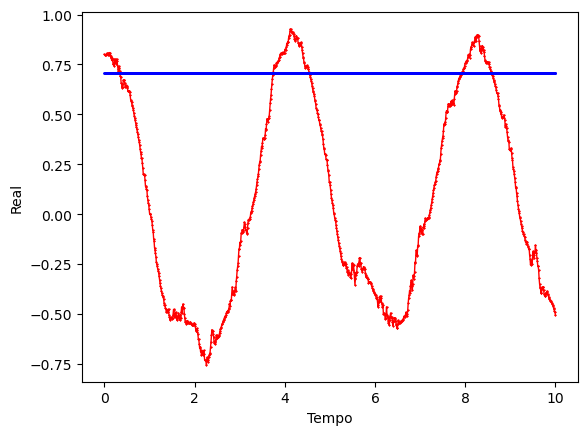

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

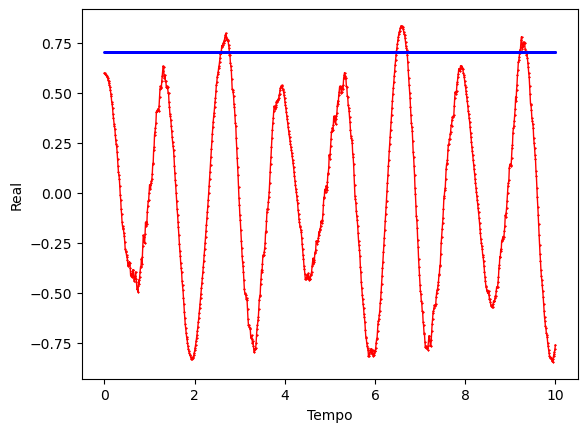

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()